## Simulation of 
### Forced vibration with rotating unbalance of single degree of freedom system [SDOF]

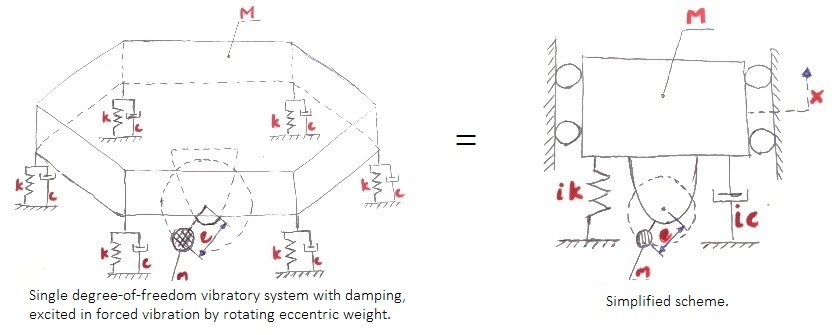

### Introduction
The model of single degree of freedom vibratory system with rotating unbalance, mounted to rigid foundation is shown on figures above.
The simplified model comes to mass ('M')-spring ('k')-damper ('c') system where an addtional mass ('m') is monunted and rotates at a distance 'e' from the axis of rotation.
Centrifugal force (F) generated by rotating mass (m) is proportional to squre of driving frequncy ($\omega$) and vaires with the speed of rotation.
Thus, forced vibration in this work refers to the motion of the vibratory system which occurs in response to harmonic excitation that magnitude changes sinusoidaly in time.
Mechanical vibration in industrial equipment can be both a symptom or a cause of a problem or can be associated with normal operation (vibration tables, conveyors).<br>

The simulation is designed to help user to better understand mechanical vibration by playing with vibratory system parameters and analyse its response by graphs and numerical output.
The interactive simulation let user to change:
* design parameters:<br>
    -> M: vibratory system mass (excluding rotating mass)<br>
    -> m: rotating mass<br>
    -> k: spring stifness<br>
    -> c: damping<br>
    -> i: number of supports<br>
* control parameters:<br>
    -> n: rotating mass speed<br>
    -> e: rotating mass eccentricity

### Objective
Use of an open source tool - python programming language to:
* solve mechanical problem:<br>
    -> solve 2nd ODE with SciPy library<br>
    -> present response on graps with Matplotlib library<br>
* create interactive appliction to let studying vibration for a non programmer:<br>
    -> use Jupyter Widgets to make simulation interactive thus let user to play with vibratory system parameters
#### Things to try:
* change vibratory system design & control parameters and observe response:
* for undamped SDOF c = 0<br> 
    -> 0 < $f/f_n$ < 1 (excitation force and harmonic response of a system are in phase)<br>
    -> $f/f_n$ > 1 (excitation force and harmonic response of a system are 180 degrees out of phase)<br>
    -> $f/f_n$ = 1 (resonance)<br>
    -> $f/f_n$ close to 1 (beating)

In [3]:
#=================================>>>>>>>>>>> Importing neccesery libraries <<<<<<<<<<<<<======================================================================  
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [14]:
#=================================>>>>>>>>>>> defining all functions that will be used further <<<<<<<<<<<<<====================================================  
# model of forced SDOF with damping
def modelSDOF(u, t, Mt, K, C, omega, omega_n, F):     
    x, dxdt = u
    dx2dt2 = - (K/(Mt))*x - (C/(Mt))*dxdt + (F/(Mt))*np.sin(omega * t)
    return [dxdt, dx2dt2]

# total vibration system springs stifness
def stifness(i, k):
    K=i*k
    return K

# total vibration system damping
def damping(i, c):
    C=i*c
    return C

# total vibration system mass
def total_mass(M, m):
    Mt=M+m
    return Mt

# undamped natural frequency, omega_n = np.sqrt(K/Mt) [rad/s]
def omegan(K, Mt):
    omega_n=np.sqrt(K/Mt)
    return omega_n

# undamped natural frequency, f_n = omega_n/(2*np.pi) [Hz]
def fn(omega_n):
    f_n = omega_n/(2*np.pi)
    return f_n

# driving frequency [Hz]
def freq(n):
    f=n/60
    return f

# driving frequency, omega = 2*np.pi*f [rad/s]
def omega(f):
    omega=2*np.pi*f
    return omega

# vibration system critical damping coefficient cc = 2*sqrt(K*Mt)
def cc(K, Mt):
    cc=2*np.sqrt(K*Mt)
    return cc

# damping ratio ζ
def zeta(C, cc):
    z=C/cc
    return z

# driving force [N]
def force(m, e, omega):
    F=m*(e/1000)*np.power(omega, 2)
    return F

# steady state response for SDOF: displacement [mm]
def displacement(F, Mt, omega_n, omega, z):
    X=(F/Mt*1/(np.sqrt((omega_n**2-omega**2)**2+(2*z*omega*omega_n)**2)))*1000
    return X

# phase angle [degC]
def phase(z, omega, omega_n, ):
    fi=np.arctan((2*z*(omega/omega_n))/(1-(omega**2/omega_n**2)))
    if fi < 0: # shifting arctan range to (0:pi)
        fi+= np.pi
    fi *= 180/np.pi # changing radians to degrees
    return fi

# function solving ODE
def solveSDOF(Mt, K, C, omega, omega_n, F):
#=================================>>>>>>>>>>> Solver Data <<<<<<<<<<<<<====================================================    
    # defining solver time vector
    t = np.linspace(0, 1.4, 12000)
    # defining initial conditions [displacement, velocity]
    x0 = [0.0, 0.0]
#=================================>>>>>>>>>>> Solving ODE <<<<<<<<<<<<<====================================================    
    # solving ODE
    ysol = odeint(modelSDOF, x0, t, args = (Mt, K, C, omega, omega_n, F))
#=================================>>>>>>>>>>> Calculation of additional vibration system response <<<<<<<<<<<<<============
    # creating containers for acceleration and force data
    acc = np.empty(np.size(t))
    Force = np.empty(np.size(t))
    # Acceleration and Force calculaton
    for item in range(np.size(t)):
        acc[item] = modelSDOF(ysol[item], t[item], Mt, K, C, omega, omega_n, F)[1]/9.81
        Force[item] = F*np.sin(omega * t[item])
#=================================>>>>>>>>>>> Ploting Results <<<<<<<<<<<<<=================================================    
    # create figure and arrangement of subplots 
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
    axs=axs.flat
    # plot displacement
    axs[0].plot(t, ysol[:, 0]*1000, '-b', linewidth = 1.0, label = 'Displacement [mm]')
    axs[0].set_facecolor('xkcd:light blue')
    axs[0].set_xlabel('time [s]')
    axs[0].set_ylabel('x(t) [mm]')
    axs[0].legend(bbox_to_anchor=(1.0, 1.08), loc = 1, borderaxespad=0)
    axs[0].grid(color = 'k', linestyle='--', linewidth = 1.0)
    # plot velocity
    axs[1].plot(t, ysol[:, 1], '-r', linewidth = 1.0, label = 'Velocity [m/s]')
    axs[1].set_facecolor('xkcd:light pink')
    axs[1].set_xlabel('time [s]')
    axs[1].set_ylabel('v(t) [m/s]')
    axs[1].legend(bbox_to_anchor=(1.0, 1.08), loc = 1, borderaxespad=0)
    axs[1].grid(color = 'k', linestyle='--', linewidth = 1.0)
    # plot acceleration
    axs[2].plot(t, acc, '-g', linewidth = 1.0, label = 'Acceleration [g]')
    axs[2].set_facecolor('xkcd:pale green')
    axs[2].set_xlabel('time [s]')
    axs[2].set_ylabel('a(t) [g]')
    axs[2].legend(bbox_to_anchor=(1.0, 1.08), loc = 1, borderaxespad=0)
    axs[2].grid(color = 'k', linestyle='--', linewidth = 1.0)
    # plot force
    axs[3].plot(t, Force, '-k', linewidth = 1.0, label = 'Force [N]')
    axs[3].set_facecolor('xkcd:light orange')
    axs[3].set_xlabel('time [s]')
    axs[3].set_ylabel('Force [N]')
    axs[3].legend(bbox_to_anchor=(1.0, 1.08), loc = 1, borderaxespad=0)
    axs[3].grid(color = 'k', linestyle='--', linewidth = 1.0)

    plt.show()
    
    return

In [15]:
# import widgets libraries
import ipywidgets as wg
from IPython.display import display
####==================================>>>>>>>>>>>> Items widgets <<<<<<<<<<<<<<============================================
### Listing all items
Items ={'M': [r'$M$: system mass','kg'], 'm': [r'$m$: rotating mass', 'kg'], 'k': [r'$k$: spring stiffness', 'N/m'],
        'c': [r'$c$: damping', 'Ns/m'], 'i': [r'$i$: number of supports', ''], 'n': [r'$n$: rotating mass speed', 'rpm'],
        'e': [r'$e$: rotating mass eccentricity', 'mm'], 'fn': [r'$f_n$: undamped natural frequency', 'Hz'],
        'f': [r'$f$: driving frequency', 'Hz'], 'wn': [r'$\omega_n$: naturaf frequency', 'rad/s'],
        'w': [r'$\omega$: driving frequency', 'rad/s'], 'F': [r'$F$: excitation force', 'N'], 
        'cc': [r'$c_c$: critical damping', ''], 'z': [r'$\zeta$: damping ratio', ''], 
        'X': [r'$X$: displacement (steady state response)', 'mm'], 'th': [r'$\theta$: phase angle', r'$^{\circ}$']}
# Items layout definition
layout_desc = {'width': '250px', 
               'margin': '0 0 0 0'}
layout_value = {'width': '80px', 
               'margin': '0 0 0 0'}
## Definition of all input widgets items
# System mass widget
M_desc = wg.Label(value=Items['M'][0] + ':', layout=layout_desc)
M_value = wg.BoundedIntText(value=600, min=1, max=1000, step=1, layout=layout_value)
M_unit = wg.Label(value=Items['M'][1])
M_widget = wg.HBox([M_desc, M_value, M_unit])

# Rotating mass widget
m_desc = wg.Label(value=Items['m'][0] + ':', layout=layout_desc)
m_value = wg.BoundedIntText(value=50, min=1, max=100, step=1, layout=layout_value)
m_unit = wg.Label(value=Items['m'][1])
m_widget = wg.HBox([m_desc, m_value, m_unit])

# Spring stiffness widget
k_desc = wg.Label(value=Items['k'][0] + ':', layout=layout_desc)
k_value = wg.BoundedIntText(value=65000, min=1, max=1000000, step=1, layout=layout_value)
k_unit = wg.Label(value=Items['k'][1])
k_widget = wg.HBox([k_desc, k_value, k_unit])

# Damping widget
c_desc = wg.Label(value=Items['c'][0] + ':', layout=layout_desc)
c_value = wg.BoundedIntText(value=1600, min=0, max=10000, step=1, layout=layout_value)
c_unit = wg.Label(value=Items['c'][1])
c_widget = wg.HBox([c_desc, c_value, c_unit])

# Supports widget
i_desc = wg.Label(value=Items['i'][0] + ':', layout=layout_desc)
i_value = wg.BoundedIntText(value=6, min=1, max=12, step=1, layout=layout_value)
i_unit = wg.Label(value=Items['i'][1])
i_widget = wg.HBox([i_desc, i_value, i_unit])

# Rotating mass speed widget
n_desc = wg.Label(value=Items['n'][0] + ':', layout=layout_desc)
n_value = wg.IntSlider(value=2300, min=1, max=3600, step=1, layout=wg.Layout(width='200px', margin='0 0 0 0'))
n_unit = wg.Label(value=Items['n'][1])
n_widget = wg.HBox([n_desc, n_value, n_unit])

# Rotating mass eccentricity widget
e_desc = wg.Label(value=Items['e'][0] + ':', layout=layout_desc)
e_value = wg.FloatSlider(value=4, min=1, max=50, step=1, layout=wg.Layout(width='200px', margin='0 0 0 0'))
e_unit = wg.Label(value=Items['e'][1])
e_widget = wg.HBox([e_desc, e_value, e_unit])

## Definition of all response widgets items   
# total vibration system springs stifness
K_value = wg.IntText(value=stifness(i_value.value, k_value.value), 
                     layout=layout_value)
def update_K(*args):
    K_value.value = stifness(i_value.value, k_value.value)
k_value.observe(update_K, 'value')
i_value.observe(update_K, 'value')

# total vibration system damping
C_value = wg.IntText(value=damping(i_value.value, c_value.value), 
                     layout=layout_value)
def update_C(*args):
    C_value.value = damping(i_value.value, c_value.value)
c_value.observe(update_C, 'value')
i_value.observe(update_C, 'value')

# total vibration system mass
Mt_value = wg.IntText(value=total_mass(M_value.value, m_value.value), 
                      layout=layout_value)
def update_Mt(*args):
    Mt_value.value = total_mass(M_value.value, m_value.value)
M_value.observe(update_Mt, 'value')
m_value.observe(update_Mt, 'value')

# undamped natural frequency, omega_n = np.sqrt(K/Mt) [rad/s]
wn_desc = wg.Label(value=Items['wn'][0] + ':', layout=layout_desc)
wn_value = wg.FloatText(value=omegan(K_value.value, Mt_value.value), 
                        layout=layout_value)
def update_wn(*args):
    wn_value.value = omegan(K_value.value, Mt_value.value)
K_value.observe(update_wn, 'value')
Mt_value.observe(update_wn, 'value')

wn_unit = wg.Label(value=Items['wn'][1])
wn_widget = wg.HBox([wn_desc, wn_value, wn_unit])

# undamped natural frequency, f_n = np.sqrt(K/Mt) [Hz]
fn_desc = wg.Label(value=Items['fn'][0] + ':', layout=layout_desc)
fn_value = wg.FloatText(value=round(fn(wn_value.value), 1), 
                      layout=layout_value, 
                      disabled=True)
def update_fn(*args):
    fn_value.value = round(fn(wn_value.value), 1)
wn_value.observe(update_fn, 'value')

fn_unit = wg.Label(value=Items['fn'][1])
fn_widget = wg.HBox([fn_desc, fn_value, fn_unit])

# driving frequency [Hz]
f_desc = wg.Label(value=Items['f'][0] + ':', layout=layout_desc)
f_value = wg.FloatText(value=round(freq(n_value.value), 1), 
                     layout=layout_value, 
                     disabled=True)
def update_f(*args):
    f_value.value = round(freq(n_value.value), 1)
n_value.observe(update_f, 'value')

f_unit = wg.Label(value=Items['f'][1])
f_widget = wg.HBox([f_desc, f_value, f_unit])

# driving frequency, omega = 2*np.pi*f [rad/s]
w_desc = wg.Label(value=Items['w'][0] + ':', layout=layout_desc)
w_value = wg.FloatText(value=omega(f_value.value), 
                     layout=layout_value)
def update_w(*args):
    w_value.value = omega(f_value.value)
f_value.observe(update_w, 'value')

w_unit = wg.Label(value=Items['w'][1])
w_widget = wg.HBox([w_desc, w_value, w_unit])

# vibration system critical damping coefficient cc = 2*sqrt(K*Mt)
cc_desc = wg.Label(value=Items['cc'][0] + ':', layout=layout_desc)
cc_value = wg.FloatText(value=cc(K_value.value, Mt_value.value), 
                        layout=layout_value)
def update_cc(*args):
    cc_value.value = cc(K_value.value, Mt_value.value)
K_value.observe(update_cc, 'value')
Mt_value.observe(update_cc, 'value')

cc_unit = wg.Label(value=Items['cc'][1])
cc_widget = wg.HBox([cc_desc, cc_value, cc_unit])

# damping ratio ζ
z_desc = wg.Label(value=Items['z'][0] + ':', layout=layout_desc)
z_value = wg.FloatText(value=round(zeta(C_value.value, cc_value.value), 2), 
                     layout=layout_value, 
                     disabled=True)
def update_z(*args):
    z_value.value = round(zeta(C_value.value, cc_value.value), 2)
C_value.observe(update_z, 'value')
cc_value.observe(update_z, 'value')

z_unit = wg.Label(value=Items['z'][1])
z_widget = wg.HBox([z_desc, z_value, z_unit])

# driving force [N]
F_desc = wg.Label(value=Items['F'][0] + ':', layout=layout_desc)
F_value = wg.IntText(value=force(m_value.value, e_value.value, w_value.value), 
                     layout=layout_value, 
                     disabled=True)
def update_F(*args):
    F_value.value = force(m_value.value, e_value.value, w_value.value)
m_value.observe(update_F, 'value')
e_value.observe(update_F, 'value')
w_value.observe(update_F, 'value')

F_unit = wg.Label(value=Items['F'][1])
F_widget = wg.HBox([F_desc, F_value, F_unit])

# phase angele [degC]
th_desc = wg.Label(value=Items['th'][0] + ':', layout=layout_desc)
th_value = wg.IntText(value=phase(z_value.value, w_value.value, wn_value.value), 
                     layout=layout_value, 
                     disabled=True)
def update_th(*args):
    th_value.value = phase(z_value.value, w_value.value, wn_value.value)
z_value.observe(update_th, 'value')
w_value.observe(update_th, 'value')
wn_value.observe(update_th, 'value')

th_unit = wg.Label(value=Items['th'][1])
th_widget = wg.HBox([th_desc, th_value, th_unit])

# steady state response for SDOF: displacement [mm]
X_desc = wg.Label(value=Items['X'][0] + ':', layout=layout_desc)
X_value = wg.FloatText(value=round(displacement(F_value.value, Mt_value.value, wn_value.value, w_value.value, z_value.value), 2), 
                     layout=layout_value, 
                     disabled=True)
def update_X(*args):
    X_value.value = round(displacement(F_value.value, Mt_value.value, wn_value.value, w_value.value, z_value.value), 2)
F_value.observe(update_X, 'value')
Mt_value.observe(update_X, 'value')
wn_value.observe(update_X, 'value')
w_value.observe(update_X, 'value')
z_value.observe(update_X, 'value')

X_unit = wg.Label(value=Items['X'][1])
X_widget = wg.HBox([X_desc, X_value, X_unit])

### Collecting dashboard items - interactive response by plotting graphs: dispalcement, velocity, acceleration, centrifugal force
graphs_output = wg.interactive_output(solveSDOF, 
                                      {'Mt': Mt_value, 'K': K_value, 'C': C_value, 'omega': w_value, 'omega_n': wn_value, 'F': F_value})

#==================================>>>>>>>>>>>> Boxes (dashboard layout) <<<<<<<<<<<<<<=======================================================
# System design input box
design_input_box_layout = wg.Layout(display='flex', 
                                    flex_flow='column', 
                                    align_items='stretch', 
                                    border='solid 2px', 
                                    width='385px', 
                                    padding='5px 5px 5px 5px')

design_input_box_items = [M_widget, m_widget, k_widget, c_widget, i_widget]
design_input_box_vertical_stack = wg.VBox(children=design_input_box_items, layout=design_input_box_layout)
design_input_box = wg.VBox([wg.Label('System design input:'), design_input_box_vertical_stack])

# System control input box
control_input_box_layout = wg.Layout(display='flex', 
                                     flex_flow='column', 
                                     align_items='stretch', 
                                     border='solid 2px', 
                                     width='495px', 
                                     padding='5px 5px 5px 5px')

control_input_box_items = [n_widget, e_widget]
control_input_box_vertical_stack = wg.VBox(children=control_input_box_items, layout=control_input_box_layout)
control_input_box = wg.VBox([wg.Label('System control input:'), control_input_box_vertical_stack])

# System output box
output_box_layout = wg.Layout(display='flex', 
                              flex_flow='column', 
                              align_items='stretch', 
                              border='green solid 3px', 
                              width='375px', 
                              padding='5px 5px 5px 5px')

output_box_items = [f_widget, fn_widget, F_widget, X_widget, th_widget]
output_box_vertical_stack = wg.VBox(children=output_box_items, layout=output_box_layout)
output_box = wg.VBox([wg.Label('System response parameters:'), output_box_vertical_stack])

#==================================>>>>>>>>>>>> Setting dashboard display <<<<<<<<<<<<<<===================================
# Dashboard layout
dashboard_layout = wg.Layout(display='flex', 
                             flex_flow='row wrap', 
                             align_items='stretch', 
                             align_content='stretch', 
                             width='100%', 
                             justify_content='space-around')

dashboard_items = [design_input_box, output_box, control_input_box, graphs_output]
dashboard_items_box = wg.Box(children=dashboard_items, layout=dashboard_layout)

# Displaying dashboard
display(dashboard_items_box)

Box(children=(VBox(children=(Label(value='System design input:'), VBox(children=(HBox(children=(Label(value='$…